[View in Colaboratory](https://colab.research.google.com/github/ajoshiusc/lesion-detector/blob/master/main_anatomy_map.ipynb)

In [1]:
!rm -rf ./lesion-detector

!git clone https://github.com/ajoshiusc/lesion-detector
!pip install nilearn
import nilearn.image
import sys
import numpy as np

sys.path.insert(0, './lesion-detector/src/SpyderNet')
  
import numpy as np
from spydernet import train_model, mod_indep_rep
from datautils import read_data
import matplotlib.pyplot as plt
from google.colab import drive

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

""" Main script that calls the functions objects"""
print('gdrive mounting')
drive.mount('/content/gdrive')
print('mounted')
""" Main script that calls the functions objects"""
data_dir = 'gdrive/My Drive/tracktbi_pilot'


data = read_data(
study_dir=data_dir, nsub=1, psize=[128, 128], npatch_perslice=64)

np.savez('gdrive/My Drive/tp_data.npz', data=data)

train_data = data #[0:-5, :, :, :]

model = train_model(train_data)

model.save('gdrive/My Drive/tp_model_softmax.h5')

test_data = data[90:95, :, :, :]

model.load_model('gdrive/My Drive/tp_model.h5') 


I, pred = mod_indep_rep(model, test_data)

plt.figure()
for j in range(5):
  plt.subplot(3, 5, j + 1)
  plt.imshow(I[j, :, :, :].squeeze(), cmap='gray')
  plt.subplot(3, 5, 5 + j + 1)
  plt.imshow(test_data[j, :, :, 0].squeeze(), cmap='gray')
  plt.subplot(3, 5, 10 + j + 1)
  plt.imshow(pred[0][j, :, :, 0].squeeze(), cmap='gray')

plt.show()

print(test_data)
print(I)

#for j in range(5):
#plt.matshow(I[j,:,:,:].squeeze())

#plt.show()



Cloning into 'lesion-detector'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 321 (delta 37), reused 33 (delta 13), pack-reused 254
Receiving objects: 100% (321/321), 17.86 MiB | 15.89 MiB/s, done.
Resolving deltas: 100% (189/189), done.
    100% |████████████████████████████████| 983kB 20.2MB/s 
    100% |████████████████████████████████| 4.2MB 7.9MB/s 
  Running setup.py bdist_wheel for nibabel ... - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/7e/97/9b/7cf05225afac39de2dacef758fc06c0c0bdf3e6efb40fabb9c
Successfully built nibabel


Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13890983918844292590
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11281553818
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6688411813062701983
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
gdrive mounting
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
mounted
subject 1 
==Defining Model  ==
Train on 9318 samples, validate on 2330 samples
E

AttributeError: ignored

In [2]:
!rm -rf ./lesion-detector

!git clone https://github.com/ajoshiusc/lesion-detector
!pip install nilearn
import nilearn.image
import sys
import numpy as np

sys.path.insert(0, './lesion-detector/src/SpyderNet')
  
from google.colab import drive
from spydernet import train_model, mod_indep_rep

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

""" Main script that calls the functions objects"""
print('gdrive mounting')
drive.mount('/content/gdrive')
print('mounted')

from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

model = load_model('gdrive/My Drive/tp_model_softmax.h5') 
  
d=np.load('gdrive/My Drive/tp_data.npz')

data=d['data']
test_data = data[190:195, :, :, :]


Cloning into 'lesion-detector'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 321 (delta 37), reused 33 (delta 13), pack-reused 254
Receiving objects: 100% (321/321), 17.86 MiB | 17.50 MiB/s, done.
Resolving deltas: 100% (189/189), done.
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16985432450123847747
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11281553818
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8120862050893101443
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
gdrive mounting
Mounted at /content/gdrive
mounted


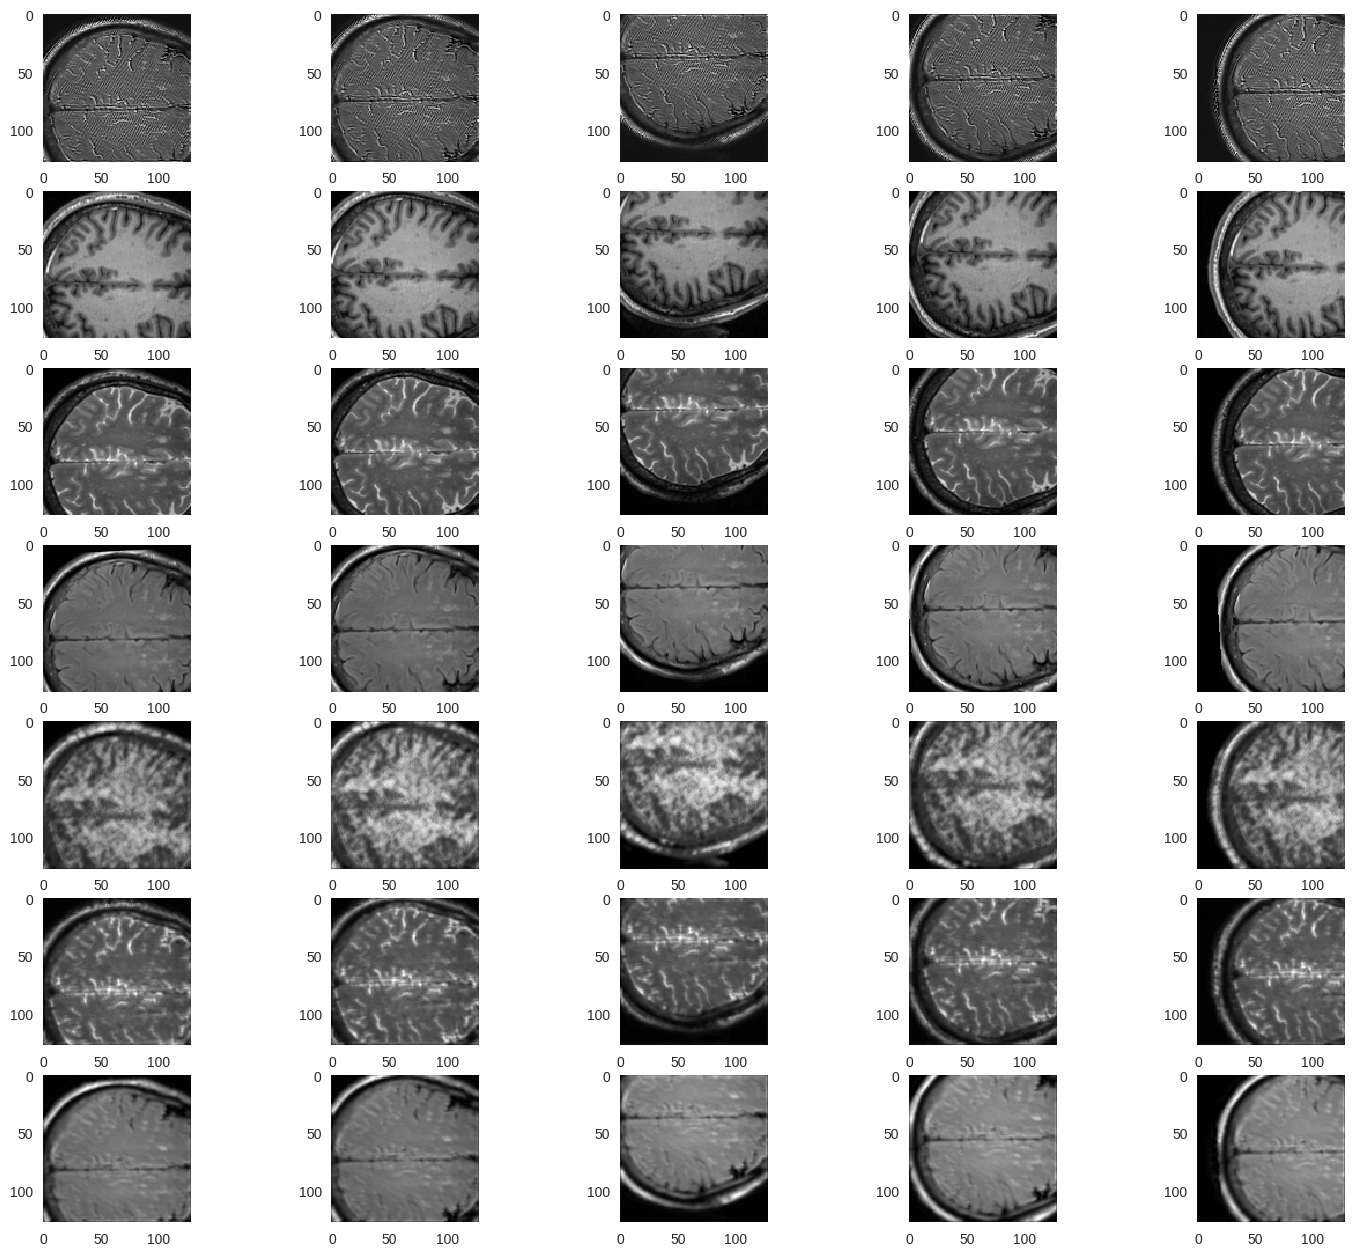

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
from spydernet import train_model, mod_indep_rep
plt.rcParams["axes.grid"] = False
test_data = data[7000:7005, :, :, :]

fig=plt.figure(figsize=(18, 16), dpi= 100, facecolor='none', edgecolor='none')


I,pred = mod_indep_rep(model, test_data)
  
#fig=plt.figure(figsize=(20, 20))

for j in range(5):
  plt.subplot(7, 5, j + 1)
  plt.imshow(1000*I[j, :, :, 0], cmap='gray')

  plt.subplot(7, 5, 5 + j + 1)
  plt.imshow(test_data[j, :, :, 0].squeeze(), cmap='gray')
  
  plt.subplot(7, 5, 10 + j + 1)
  plt.imshow(test_data[j, :, :, 1].squeeze(), cmap='gray')

  plt.subplot(7, 5, 15 + j + 1)
  plt.imshow(test_data[j, :, :, 2].squeeze(), cmap='gray')
  
  plt.subplot(7, 5, 20 + j + 1)
  plt.imshow(pred[0][j, :, :, 0].squeeze(), cmap='gray')

  plt.subplot(7, 5, 25 + j + 1)
  plt.imshow(pred[1][j, :, :, 0].squeeze(), cmap='gray')

  plt.subplot(7, 5, 30 + j + 1)
  plt.imshow(pred[2][j, :, :, 0].squeeze(), cmap='gray')
  
plt.show()
